In [46]:
# -----------------------------------------------
# Cell 1 : Imports and Global Settings
# -----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md, display

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 5)

# Create output folder if missing
import os, pathlib
pathlib.Path("../output").mkdir(exist_ok=True)

In [48]:
# -----------------------------------------------
# Cell 2 : Load Key Artefacts Created Earlier
# -----------------------------------------------
# Cleaned data
df = pd.read_csv("../data/processed/cleaned.csv", parse_dates=["Date"])

# Clustered store data (from 04_customer_segmentation.ipynb)
clustered = pd.read_csv("../data/processed/clustered_store_data.csv")

# Association rules (from 05_market_basket_analysis.ipynb)
rules = pd.read_csv("../output/association_rules.csv")

# SARIMAX forecasts (from 06_demand_forecasting.ipynb)
forecast = pd.read_csv("../output/sarimax_corrected_forecast.csv", parse_dates=["Date"])

# Forecast metrics
with open("../output/sarimax_forecast_metrics.txt") as f:
    metrics_txt = f.read()

display(md("### Data Loaded Successfully"))

### Data Loaded Successfully

In [49]:
clustered.columns

Index(['Store', 'Weekly_Sales_sum', 'Weekly_Sales_mean', 'Temperature_mean',
       'Fuel_Price_mean', 'CPI_mean', 'Unemployment_mean', 'Size_mean', 'PC1',
       'PC2', 'Customer_Type'],
      dtype='object')

In [56]:
# -----------------------------------------------
# Cell 3 : Quick KPI Dashboard
# -----------------------------------------------
latest_sales      = df["Weekly_Sales"].iloc[-1]
total_stores      = df["Store"].nunique()
segments_created  = clustered["Customer_Type"].nunique()  # Updated here
rules_count       = len(rules)
rmse_line         = metrics_txt.splitlines()[0]  # "RMSE: xx.xx"
mape_line         = metrics_txt.splitlines()[1]  # "MAPE: xx.xx%"

display(md(f"""
| KPI | Value |
|-----|-------|
| Latest Weekly Sales | **{latest_sales:,.0f}** |
| Total Stores | **{total_stores}** |
| Store Segments | **{segments_created}** |
| Association Rules | **{rules_count}** |
| {rmse_line} |  |
| {mape_line} |  |
"""))


| KPI | Value |
|-----|-------|
| Latest Weekly Sales | **1,077** |
| Total Stores | **45** |
| Store Segments | **3** |
| Association Rules | **3026** |
| RMSE: 2129776.59 |  |
| MAPE: 3.68% |  |


/var/folders/cw/s25mby6x1nqchk_mn3v6tl7w0000gn/T/ipykernel_64279/3693272792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer_Type", y="Weekly_Sales_mean", data=seg_sales, palette="Set2")


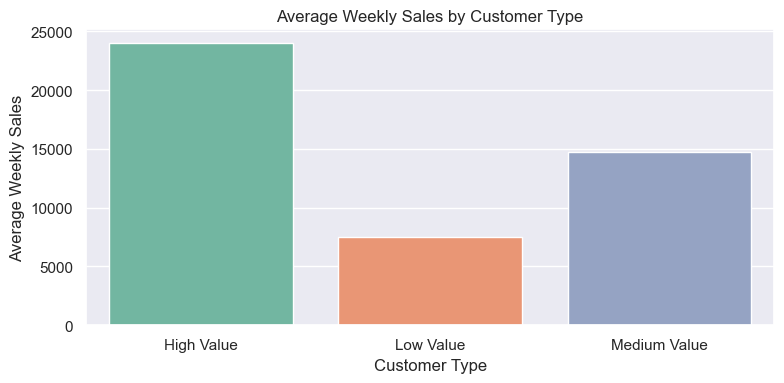

In [66]:
# -----------------------------------------------
# Cell 4 : Visual 1 – Average Weekly Sales by Customer Type
# -----------------------------------------------
plt.figure(figsize=(8, 4))
sns.barplot(x="Customer_Type", y="Weekly_Sales_mean", data=seg_sales, palette="Set2")
plt.title("Average Weekly Sales by Customer Type")
plt.ylabel("Average Weekly Sales")
plt.xlabel("Customer Type")
plt.tight_layout()
plt.savefig("../output/customer_type_sales_bar.png")
plt.show()

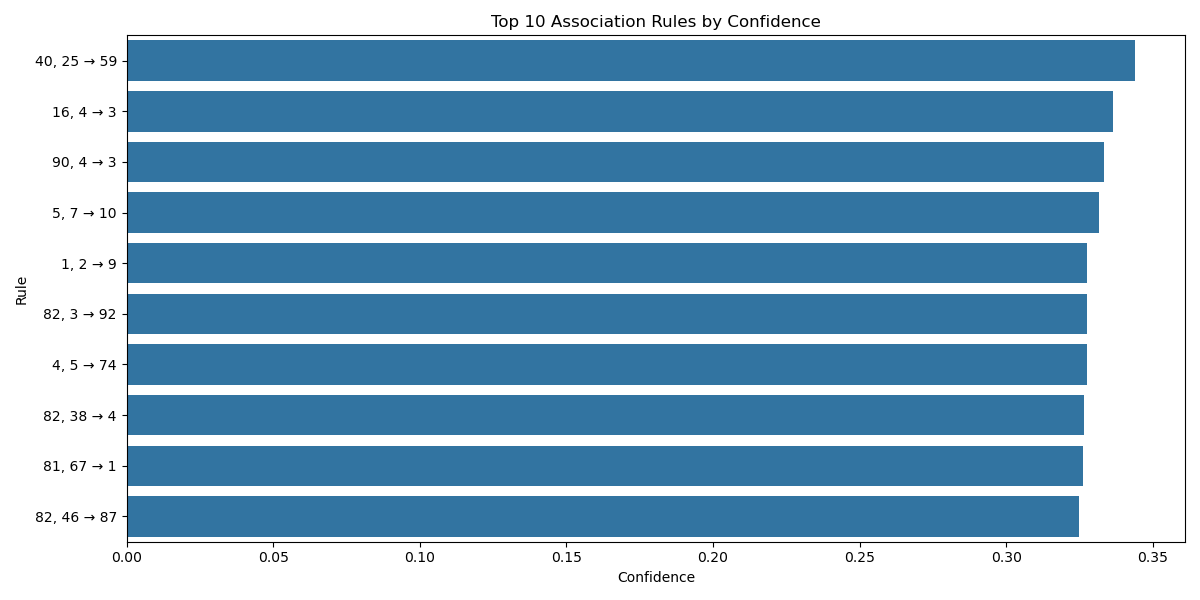

In [86]:
# -----------------------------------------------
# Cell 5 : Visual 2 – Top 10 Association Rules by Confidence
# -----------------------------------------------
from IPython.display import Image, display


filepath="../output/top_association_rules.png"
display(Image(filename=filepath))

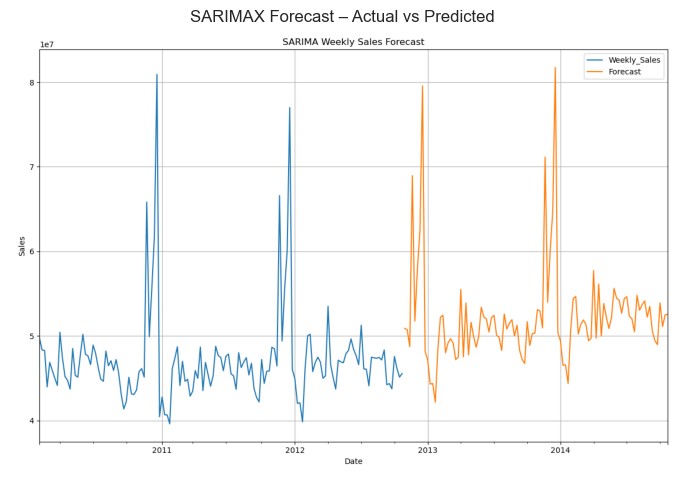

In [92]:
# -----------------------------------------------
# Cell 6 : Visual 3 – Forecast vs Actual (Pulled image)
# -----------------------------------------------
from PIL import Image
import matplotlib.image as mpimg
plt.figure(figsize=(10, 5))
img = mpimg.imread("../output/sarimax_forecast.png")
plt.imshow(img)
plt.axis("off")
plt.title("SARIMAX Forecast – Actual vs Predicted")
plt.tight_layout()
plt.show()